<a href="https://colab.research.google.com/github/AroraAnshul301/SVM/blob/main/Assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset...

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sepallength  150 non-null    float64 
 1   sepalwidth   150 non-null    float64 
 2   petallength  150 non-null    float64 
 3   petalwidth   150 non-null    float64 
 4   target       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

First Few Rows:
   sepallength  sepalwidth  petallength  petalwidth       target
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

Class Distribution in the Target Variable:
target
Iris-setosa        50
Iris-versicolor    5

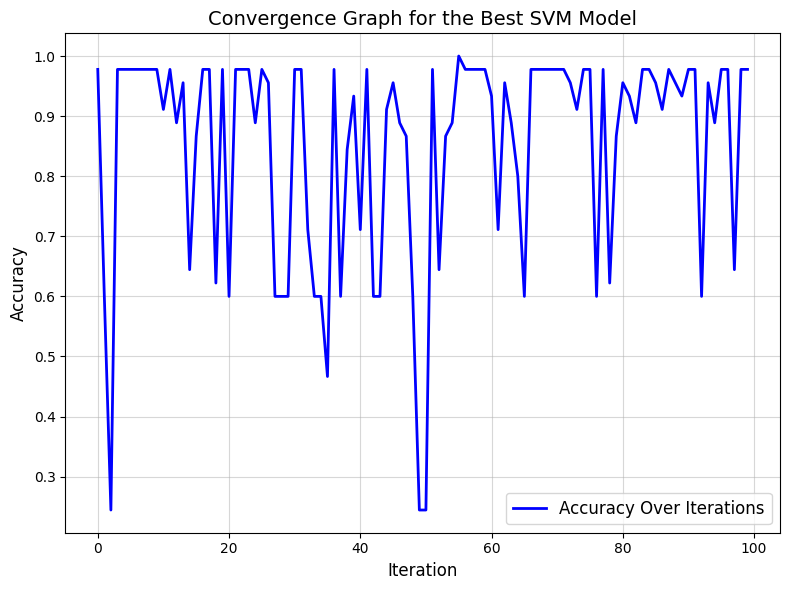


Results have been saved to 'Optimized_SVM_Performance.csv'. Consider uploading this file to your GitHub repository.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

print("Loading dataset...")
uci_dataset = fetch_openml("iris", version=1)
data_frame = pd.DataFrame(uci_dataset.data, columns=uci_dataset.feature_names)
data_frame['target'] = uci_dataset.target

print("\nDataset Summary:")
print(data_frame.info())
print("\nFirst Few Rows:")
print(data_frame.head())
print("\nClass Distribution in the Target Variable:")
print(data_frame['target'].value_counts())

features = data_frame.drop(columns=['target'])
target = data_frame['target']

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

data_splits = []
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        normalized_features, target, test_size=0.3, random_state=seed
    )
    data_splits.append((X_train, X_test, y_train, y_test))

optimization_results = []

for sample_index, (X_train, X_test, y_train, y_test) in enumerate(data_splits):
    best_accuracy = 0
    optimal_parameters = None
    accuracy_progress = []

    for iteration in range(100):
        chosen_kernel = np.random.choice(['linear', 'poly', 'rbf', 'sigmoid'])
        chosen_c = np.random.uniform(0.1, 1.0)
        chosen_gamma = np.random.uniform(0.01, 0.1)

        svm_model = SVC(kernel=chosen_kernel, C=chosen_c, gamma=chosen_gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        predictions = svm_model.predict(X_test)

        current_accuracy = accuracy_score(y_test, predictions)
        accuracy_progress.append(current_accuracy)

        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            optimal_parameters = (chosen_kernel, chosen_c, chosen_gamma)

    optimization_results.append({
        "Sample": f"Sample-{sample_index + 1}",
        "Best Accuracy": best_accuracy,
        "Optimal Parameters": optimal_parameters,
        "Accuracy Progress": accuracy_progress
    })

    print(f"\nSample {sample_index + 1} - Best Accuracy: {best_accuracy:.4f}")
    print(f"Optimal Parameters: Kernel={optimal_parameters[0]}, C={optimal_parameters[1]:.4f}, Gamma={optimal_parameters[2]:.4f}")

summary_df = pd.DataFrame({
    "Sample": [result["Sample"] for result in optimization_results],
    "Best Accuracy": [result["Best Accuracy"] for result in optimization_results],
    "Optimal Parameters": [result["Optimal Parameters"] for result in optimization_results]
})
print("\nPerformance Summary Table:")
print(summary_df)

top_sample = max(optimization_results, key=lambda res: res["Best Accuracy"])
plt.figure(figsize=(8, 6))
plt.plot(top_sample["Accuracy Progress"], label="Accuracy Over Iterations", color="blue", linewidth=2)
plt.title("Convergence Graph for the Best SVM Model", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

output_file = "Optimized_SVM_Performance.csv"
summary_df.to_csv(output_file, index=False)
print(f"\nResults have been saved to '{output_file}'. Consider uploading this file to your GitHub repository.")